In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.ndimage import gaussian_filter
%matplotlib inline

In [2]:
def generate_1d_signal(gain=500):
    np.random.seed(0)
    x = np.linspace(0, 128, 128)
    yy = (0.7 - 0.28) / (30 - 90) * (x-30) + 0.7
    
    y = np.where((30 < x) & (x <= 90), yy, 0.28)
    y[x > 90] = 0.7
    
    sig = np.random.poisson(y * gain)
    sig = sig / gain
    sig = np.clip(sig, 0.0, 1.0)
    return sig

In [3]:
sig = generate_1d_signal()
# plt.figure()
# plt.plot(sig)
# plt.show()

In [4]:
sample_space = 8
sample_value = 0.03

sig_value=3.5
sig_space=1

In [5]:
#make grid
n = len(sig)
h = math.ceil(np.max(sig) / sample_value)
w = math.ceil(n / sample_space)
grid = np.zeros(shape = (2,h,w),dtype = np.float)
# nomlize grid
# for row in range(h):
#     for col in range(w):
#         grid[0,row,col] = 1
#         grid[1,row,col] = row * sample_value 
for i in range(sig.shape[0]):
    #pixl cnt
    grid[0,math.floor(sig[i] / sample_value),i // sample_space] += 1
    #value sum
    grid[1,math.floor(sig[i] / sample_value),i // sample_space] += sig[i]    

In [6]:
#filter grid
grid[0] = gaussian_filter(grid[0], sigma=(sig_value, sig_space))
grid[1] = gaussian_filter(grid[1], sigma=(sig_value, sig_space))
vgrid = grid[1]  / grid[0]

In [7]:
#slice
mask = [0 for i in sig]
index = np.arange(vgrid.shape[0])
for i in range(len(sig)):
    yin = sig[i]
    y = yin / sample_value
    x = i // sample_space
    mask[i] = np.interp(y,index,vgrid[:,x])

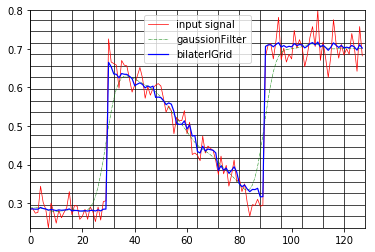

In [8]:
# show grid
plt.figure()
h_range = np.arange(0,n,sample_space)
v_range = np.arange(np.min(sig),np.max(sig),sample_value)
ax = plt.gca()
ax.set_ylim([np.min(sig), np.max(sig)])
ax.set_xlim([0, n])
sig_lfp = gaussian_filter(sig,sigma = 3.5)
plt.vlines(h_range,ymin =np.min(sig),ymax = np.max(sig),linewidth = 0.7)
plt.hlines(v_range,xmin = 0,xmax = n,linewidth = 0.7)
plt.plot(sig,"r-",label = "input signal",linewidth = 0.7)
plt.plot(sig_lfp,"g-.",label = "gaussionFilter",linewidth = 0.5)
plt.plot(mask,"b-",label = "bilaterlGrid",linewidth = 1.2)
plt.legend()